In [1]:
import keras
# Cargue el conjunto de datos Fashion MNIST
fmnist = keras.datasets.fashion_mnist
# Cargue la dicisión de entrenamiento y prueba del conjunto de datos Fashion MNIST
(training_images, training_labels), (test_images, test_labels) = fmnist.load_data()

4422102/4422102 [==============================] - 1s 0us/step


Label: 0
Image:
 [[  0   0   0   0   0   1   0   0   0   0  41 188 103  54  48  43  87 168 133  16   0   0   0   0   0   0   0   0]
 [  0   0   0   1   0   0   0  49 136 219 216 228 236 255 255 255 255 217 215 254 231 160  45   0   0   0   0   0]
 [  0   0   0   0   0  14 176 222 224 212 203 198 196 200 215 204 202 201 201 201 209 218 224 164   0   0   0   0]
 [  0   0   0   0   0 188 219 200 198 202 198 199 199 201 196 198 198 200 200 200 200 201 200 225  41   0   0   0]
 [  0   0   0   0  51 219 199 203 203 212 238 248 250 245 249 246 247 252 248 235 207 203 203 222 140   0   0   0]
 [  0   0   0   0 116 226 206 204 207 204 101  75  47  73  48  50  45  51  63 113 222 202 206 220 224   0   0   0]
 [  0   0   0   0 200 222 209 203 215 200   0  70  98   0 103  59  68  71  49   0 219 206 214 210 250  38   0   0]
 [  0   0   0   0 247 218 212 210 215 214   0 254 243 139 255 174 251 255 205   0 215 217 214 208 220  95   0   0]
 [  0   0   0  45 226 214 214 215 224 205   0  42  35  60  16  

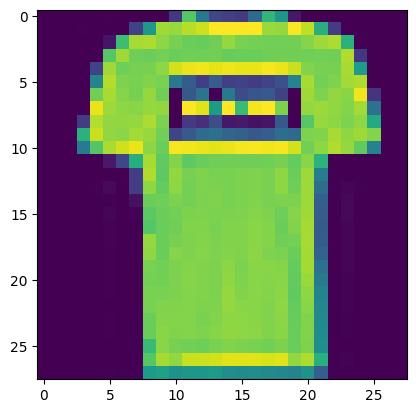

In [2]:
import numpy as np
import matplotlib.pyplot as plt
# Puedes poner aquí entre 0 y 59999
index = 1
# Imprime la etiqueta y la imagen
np.set_printoptions(linewidth=320)
print(f'Label: {training_labels[index]}')
print(f'Image:\n {training_images[index]}')
#Visualiza la imagen
plt.imshow(training_images[index])

In [3]:
# Normalizar los valores de pixeles del tren y probar las imágenes
training_images = training_images / 255.0
test_images = test_images / 255.0

In [4]:
# Construir el modelo
model = keras.models.Sequential([keras.layers.Flatten(input_shape=(28,28)),
                                 keras.layers.Dense(128, activation='relu'),
                                 keras.layers.Dense(10, activation='softmax')])

In [5]:
# Compilar el modelo
model.compile(optimizer='adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101770 (397.54 KB)
Trainable params: 101770 (397.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [6]:
# Entrenar el modelo
history = model.fit(training_images, training_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.4925 - accuracy: 0.8264
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3740 - accuracy: 0.8650
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3332 - accuracy: 0.8787
Epoch 4/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3121 - accuracy: 0.8856
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2949 - accuracy: 0.8910
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2797 - accuracy: 0.8970
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2673 - accuracy: 0.9006
Epoch 8/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2579 - accuracy: 0.9038
Epoch 9/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2455 - accuracy: 0.9081
Epoch 10/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.238

<Axes: >

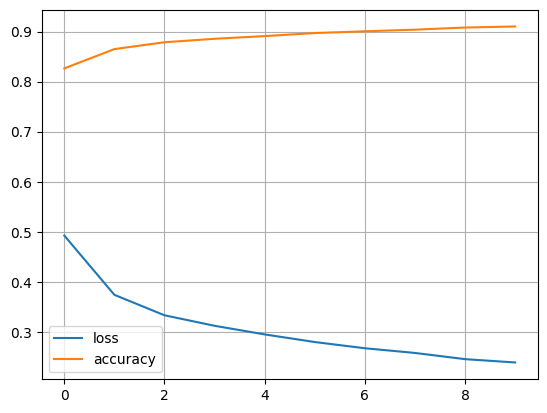

In [7]:
# Graficar el historial de entrenamiento
import pandas as pd
pd.DataFrame(history.history).plot(grid=True)

In [8]:
# Evaluar el modelo en el conjunto de entrenamiento
loss, accuracy = model.evaluate(training_images, training_labels)
print("Pérdida en el conjunto de entrenamiento:", loss)
print("Precisión en el conjunto de entrenamiento:", accuracy)

# Evaluar el modelo con datos no vistos
loss, accuracy = model.evaluate(test_images, test_labels)
print("Pérdida en el conjunto de prueba:", loss)
print("Precisión en el conjunto de prueba:", accuracy)

1875/1875 [==============================] - 4s 2ms/step - loss: 0.2163 - accuracy: 0.9203
Pérdida en el conjunto de entrenamiento: 0.2162507176399231
Precisión en el conjunto de entrenamiento: 0.9203333258628845
313/313 [==============================] - 1s 2ms/step - loss: 0.3265 - accuracy: 0.8848
Pérdida en el conjunto de prueba: 0.32648730278015137
Precisión en el conjunto de prueba: 0.8848000168800354


In [9]:
#predict
index = 1
print(f'Label: {test_labels[index]}')
classification = model.predict(test_images[index:index+1])
print(f'Classification:\n {classification.reshape(-1,1)}')

Label: 2
1/1 [==============================] - 0s 87ms/step
Classification:
 [[5.17809567e-05]
 [5.29616846e-17]
 [9.98456359e-01]
 [5.17407395e-10]
 [1.26093673e-03]
 [2.27640187e-18]
 [2.30850987e-04]
 [8.05943138e-20]
 [1.07165535e-11]
 [3.52048740e-13]]
